# **Abstract**

The Stroke Prediction Dataset provides a comprehensive collection of health-related information, aiming to assess the risk of stroke in individuals.
The objective of this analysis is to evaluate the dataset's quality and identify significant features that may contribute to predicting the likelihood of stroke. The exploration involves statistical methods such as descriptive statistics, regression analysis and visualization techniques like histogram, pie chart, Q-Q plot and box-plot using Python's matplotlib and seaborn libraries. Key questions addressed in the analysis include:

1. What are the data types? (Only numeric and categorical)

2. Are there missing values?

3. What are the likely distributions of the numeric variables?

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

5. Which independent variables have missing data? How much?

6. Do the training and test sets have the same data?

7. In the predictor variables independent of all the other predictor variables?

8. Which predictor variables are the most important?

9. Do the ranges of the predictor variables make sense?

10. What are the distributions of the predictor variables?

11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.


# **Dataset**

The dataset comprises 15,000 records and 22 fields related to stroke prediction metrics. It includes various patient demographics and health indicators as showin the below table:


| Field                      | Description                                |
| -------------------------- | ------------------------------------------ |
| Patient ID                 | Unique identifier for each patient         |
| Patient Name               | Name of the patient                        |
| Age                        | Age of the patient                         |
| Gender                     | Gender of the patient (Male/Female)       |
| Hypertension               | Presence of hypertension (Yes/No)         |
| Heart Disease              | Presence of heart disease (Yes/No)        |
| Marital Status             | Marital status of the patient             |
| Work Type                  | Type of work (e.g., Private, Govt Job)    |
| Residence Type             | Type of residence (Urban/Rural)           |
| Average Glucose Level      | Average glucose level in the blood        |
| Body Mass Index (BMI)      | Body Mass Index of the patient            |
| Smoking Status             | Smoking status (e.g., Smoker, Non-smoker) |
| Alcohol Intake             | Alcohol intake status (Yes/No)            |
| Physical Activity          | Level of physical activity                |
| Stroke History             | History of stroke (Yes/No)                |
| Family History of Stroke   | Family history of stroke (Yes/No)         |
| Dietary Habits             | Dietary habits of the patient             |
| Stress Levels              | Stress levels of the patient              |
| Blood Pressure Levels      | Blood pressure levels of the patient      |
| Cholesterol Levels         | Cholesterol levels of the patient         |
| Symptoms                   | Symptoms reported by the patient          |
| Diagnosis                  | Diagnosis of stroke (Yes/No)              |





# **Data Processing**

In [1]:
# Importing the dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
# Reading the stroke prediction dataset

data = pd.read_csv(
    "https://raw.githubusercontent.com/soumyaneu98/DataScience_Stroke_Prediction/main/stroke_prediction_dataset_with_missing_values.csv"
)

In [3]:
# Displaying few records

data.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [4]:
# Summary of dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

# **Q1.  What are the data types? (Only numeric and categorical)**

In [5]:
# Retrieve data types of columns in dataset

data_types = data.dtypes
print("Data Types of Columns In Dataset:")
print(data_types)

# Filtering numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
categorical_columns = data.select_dtypes(include=['object'])

print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)


Data Types of Columns In Dataset:
Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Blood Pressure Levels        object
Cholesterol Levels           object
Symptoms                     object
Diagnosis                    object
dtype: object

Numerical Columns:
       Patient ID  Age  Hypertension  Heart Disease  Average Glucose Level  \
0           18153   56             0              1           

In [6]:
# Numerical column names

numerical_column_names = numerical_columns.columns
print("Numerical Column Names: \n")
print(numerical_column_names)

Numerical Column Names: 

Index(['Patient ID', 'Age', 'Hypertension', 'Heart Disease',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Stroke History',
       'Stress Levels'],
      dtype='object')


In [7]:
categorical_column_names = categorical_columns.columns
print("Categorical Column Names: \n")
print(categorical_column_names)

Categorical Column Names: 

Index(['Patient Name', 'Gender', 'Marital Status', 'Work Type',
       'Residence Type', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Family History of Stroke', 'Dietary Habits',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')


In [8]:
# Print the count of numerical and categorical columns

num_numerical_columns = len(numerical_columns.columns)
num_categorical_columns = len(categorical_columns.columns)

print("\nNumber of Numerical Columns:", num_numerical_columns)
print("Number of Categorical Columns:", num_categorical_columns)


Number of Numerical Columns: 8
Number of Categorical Columns: 14


# **Q2. Are there missing values?**

In [9]:
# Checking if any data is missing

data.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  5
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

The dataset has missing values for Symptoms column (categorical) and Stress Levels column (numerical).

**Handling missing values**

In [10]:
# Checking for missing values and print column name and count

missing_values = data.isnull().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing value(s).")

Column 'Stress Levels' has 5 missing value(s).
Column 'Symptoms' has 2500 missing value(s).


In [11]:
# Checking if any data is missing
data.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  5
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [12]:
# Imputing missing values in categorical column - 'Symptoms'

data["Symptoms"].fillna(method ='ffill', inplace = True)

The forward fill method is used to fill the missing values in the categorical column.


In [13]:
# Checking if any data is missing in categorical column - 'Symptoms'
data.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               5
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

In [14]:
# Identify columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()].tolist()

# Print the column names with missing values
print("Columns with missing values:", columns_with_missing_values)


Columns with missing values: ['Stress Levels']


In [15]:
# Print the column name with missing values

if len(columns_with_missing_values) == 1:
    column_with_missing_values = columns_with_missing_values[0]
    print("Column with missing values:", column_with_missing_values)


Column with missing values: Stress Levels


In [16]:
# Identify rows with missing values before imputation
missing_rows_before = data[data[column_with_missing_values].isnull()]
print("\nRows with missing values before imputation: \n")
print(missing_rows_before)

# Store the indices of records with missing values before imputation
if not missing_rows_before.empty:
    indices_missing_before = missing_rows_before.index.tolist()
print("\nIndices with missing values:")
print(indices_missing_before)

# Impute missing values with mean
mean_value = data[column_with_missing_values].mean()
print("\nMean value of the column with missing values:")
print(mean_value)

data.loc[missing_rows_before.index, column_with_missing_values] = data[column_with_missing_values].fillna(mean_value)

# Get the records with missing values after imputation using the stored indices
records_after_imputation = data.loc[indices_missing_before]

print("\nRows with missing values before imputation: \n")
print(records_after_imputation)


Rows with missing values before imputation: 

      Patient ID   Patient Name  Age  Gender  Hypertension  Heart Disease  \
44         52662    Kaira Wagle   21    Male             0              0   
454        44373    Lagan Ahuja   79    Male             0              1   
568        70886     Zoya Bajwa   86    Male             0              1   
1276       26077    Damini Mann   64  Female             1              1   
1501       49574  Aayush Bhatia   80    Male             1              1   

     Marital Status       Work Type Residence Type  Average Glucose Level  \
44          Married         Private          Urban                  64.83   
454        Divorced   Self-employed          Rural                 155.28   
568          Single    Never Worked          Urban                 138.07   
1276       Divorced  Government Job          Rural                 166.56   
1501        Married         Private          Rural                 170.72   

      ...    Alcohol Intake

In [17]:
# Checking if any data is missing in categorical column - 'Symptoms'
data.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

**Checking for duplicates**

In [18]:
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Patient ID, Patient Name, Age, Gender, Hypertension, Heart Disease, Marital Status, Work Type, Residence Type, Average Glucose Level, Body Mass Index (BMI), Smoking Status, Alcohol Intake, Physical Activity, Stroke History, Family History of Stroke, Dietary Habits, Stress Levels, Blood Pressure Levels, Cholesterol Levels, Symptoms, Diagnosis]
Index: []

[0 rows x 22 columns]


In [19]:
# Check for duplicates
duplicates = data[data.duplicated()]

# Display columns with duplicates
if not duplicates.empty:
    duplicate_columns = data.columns[data.duplicated(keep=False)]
    print("Columns with Duplicates:")
    print(duplicate_columns)
else:
    print("No duplicates found.")

No duplicates found.


**Cleaning the data in columns**

In [20]:
# Splitting the Blood Pressure Levels column into Systolic and Diastolic levels
data[['Systolic', 'Diastolic']] = data['Blood Pressure Levels'].str.split('/', expand=True).astype(int)

data[['Systolic', 'Diastolic']]

,Systolic,Diastolic
0,140,108
1,146,91
2,154,97
3,174,81
4,121,95
...,...,...
14995,171,92
14996,155,71
14997,121,110
14998,157,74


In [21]:
# Splitting the Cholestrol Levels column into HDL and LDL
data['HDL'] = data['Cholesterol Levels'].str.extract(r'HDL: (\d+)').astype(int)
data['LDL'] = data['Cholesterol Levels'].str.extract(r'LDL: (\d+)').astype(int)

# Now there are separate columns for HDL and LDL values
data[['HDL', 'LDL']]

,HDL,LDL
0,68,133
1,63,70
2,59,95
3,70,137
4,65,68
...,...,...
14995,44,153
14996,35,183
14997,57,159
14998,79,91


In [22]:
# Dropping these columns as new columns HDL and LDL are created from Cholestrol Levels and Systolic and Diastolic columns are created from Blood Pressure Levels
data.drop(columns=['Blood Pressure Levels','Cholesterol Levels'],inplace=True)

In [23]:
# Stroke Prediction Dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [24]:
# Descriptive statistics
data.describe(include='all')

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
count,15000.000000,15000,15000.000000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,...,15000.000000,15000,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,13818,NaN,2,NaN,NaN,3,4,2,NaN,...,NaN,2,7,NaN,5786,2,NaN,NaN,NaN,NaN
top,NaN,Ela Sarna,NaN,Male,NaN,NaN,Single,Private,Rural,NaN,...,NaN,Yes,Paleo,NaN,Difficulty Speaking,No Stroke,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,7622,NaN,NaN,5156,3863,7529,NaN,...,NaN,7592,2192,NaN,330,7532,NaN,NaN,NaN,NaN
mean,49715.802867,NaN,54.035667,NaN,0.249000,0.502933,NaN,NaN,NaN,129.445209,...,0.500267,NaN,NaN,5.022686,NaN,NaN,135.048467,84.897667,55.064933,125.054267
std,29000.656642,NaN,21.063111,NaN,0.432448,0.500008,NaN,NaN,NaN,40.487792,...,0.500017,NaN,NaN,2.873223,NaN,NaN,26.367423,14.683872,14.845410,37.593233
min,1.000000,NaN,18.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,60.000000,...,0.000000,NaN,NaN,0.000000,NaN,NaN,90.000000,60.000000,30.000000,60.000000
25%,24562.000000,NaN,36.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,94.517500,...,0.000000,NaN,NaN,2.540000,NaN,NaN,112.000000,72.000000,42.000000,92.000000
50%,49448.000000,NaN,54.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,128.900000,...,1.000000,NaN,NaN,5.050000,NaN,NaN,135.000000,85.000000,55.000000,125.000000
75%,75112.000000,NaN,72.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,164.592500,...,1.000000,NaN,NaN,7.520000,NaN,NaN,158.000000,98.000000,68.000000,158.000000


In [25]:
# Removing irrelevant features
data.drop(['Patient ID', 'Patient Name'], axis='columns', inplace=True)

In [26]:
# Summary of dataset after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

In [27]:
# Checking datatypes of columns
data.dtypes

Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Symptoms                     object
Diagnosis                    object
Systolic                      int64
Diastolic                     int64
HDL                           int64
LDL                           int64
dtype: object

In [28]:
# Creating a copy of cleansed dataset
copied_data = data
copied_data.to_csv('stroke_prediction_cleansed_dataset.csv', index=False)

# **Data Analysis**

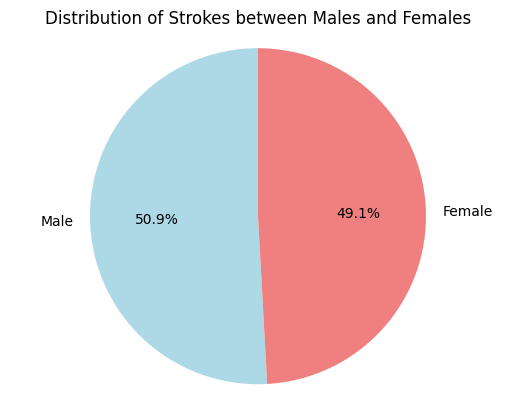

In [29]:
# Data Analysis based on Gender
stroke_counts = data[data['Diagnosis'] == 'Stroke']['Gender'].value_counts()

# Creating a pie chart depicting distribution of stroke based on gender
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')
plt.title('Distribution of Strokes between Males and Females')
plt.savefig("1.png")
plt.show()

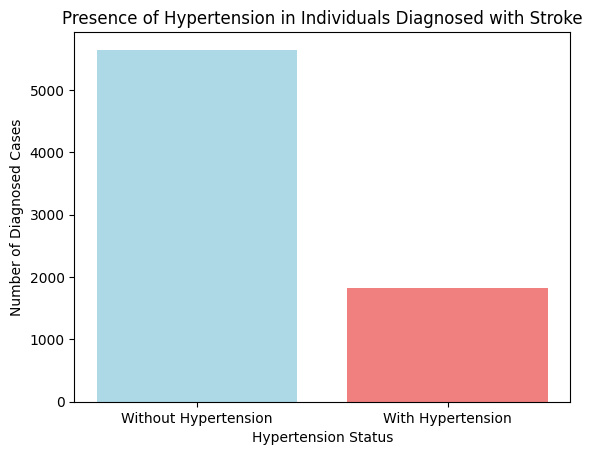

In [30]:
# Data Analysis based on Hypertension
hypertension_counts = data[data['Diagnosis'] == 'Stroke']['Hypertension'].value_counts()

# Creating a bar plot depicting distribution of stroke based on hypertension
plt.bar(['Without Hypertension', 'With Hypertension'], hypertension_counts, color=['lightblue', 'lightcoral'])
plt.title('Presence of Hypertension in Individuals Diagnosed with Stroke')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Diagnosed Cases')
plt.savefig('2.png')
plt.show()

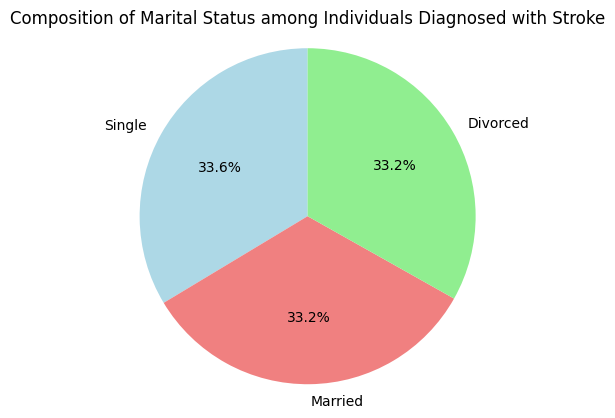

In [31]:
# Data Analysis based on Marital Status
marital_status_counts = data[data['Diagnosis'] == 'Stroke']['Marital Status'].value_counts()

# Creating a pie chart depicting distribution of stroke based on marital status
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Composition of Marital Status among Individuals Diagnosed with Stroke')
plt.savefig('3.png')
plt.show()

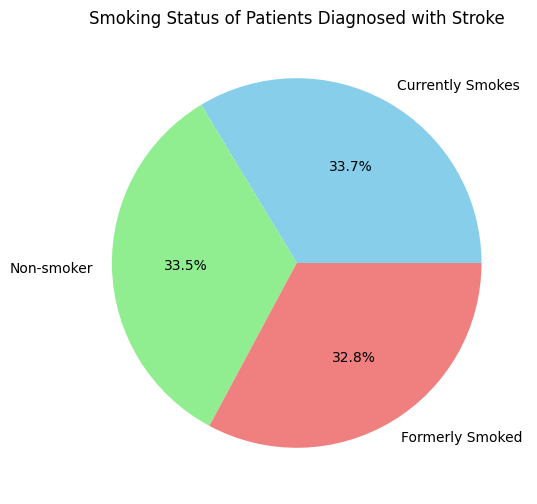

In [32]:
# Data Analysis based on Smoking Status
smoking_status_counts = data[data['Diagnosis'] == 'Stroke']['Smoking Status'].value_counts()

# Creating a pie chart depicting distribution of stroke based on smoking status

plt.figure(figsize=(8, 6))
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Smoking Status of Patients Diagnosed with Stroke')
plt.savefig('4.png')
plt.show()

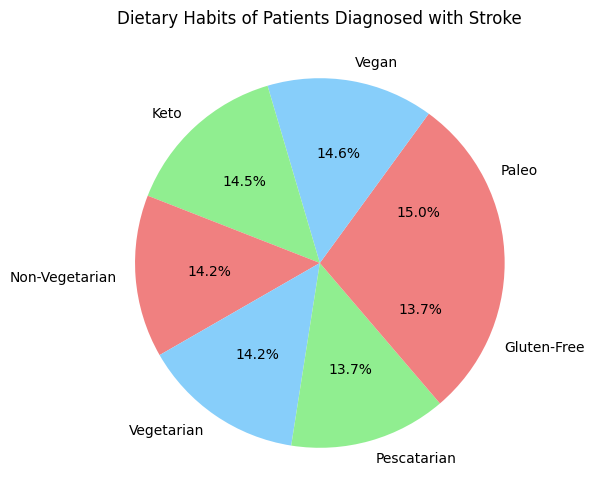

In [33]:
# Data Analysis based on Dietary Habits
dietary_habits_counts = data[data['Diagnosis'] == 'Stroke']['Dietary Habits'].value_counts()

# Creating a pie chart depicting distribution of stroke based on dietary habits
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plotting a pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(dietary_habits_counts, labels=dietary_habits_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Dietary Habits of Patients Diagnosed with Stroke')
plt.savefig('5.png')
plt.show()

# **Data Balance**

In [34]:
# Checking the data balance of the target variable - 'Diagnosis'
data['Diagnosis'].value_counts()

No Stroke    7532
Stroke       7468
Name: Diagnosis, dtype: int64

The target variable, 'Diagnosis,' indicates whether an individual has experienced a stroke ('Stroke') or not ('No Stroke'). The dataset is well-balanced, with nearly equal distribution of records for both categories, facilitating a comprehensive analysis.


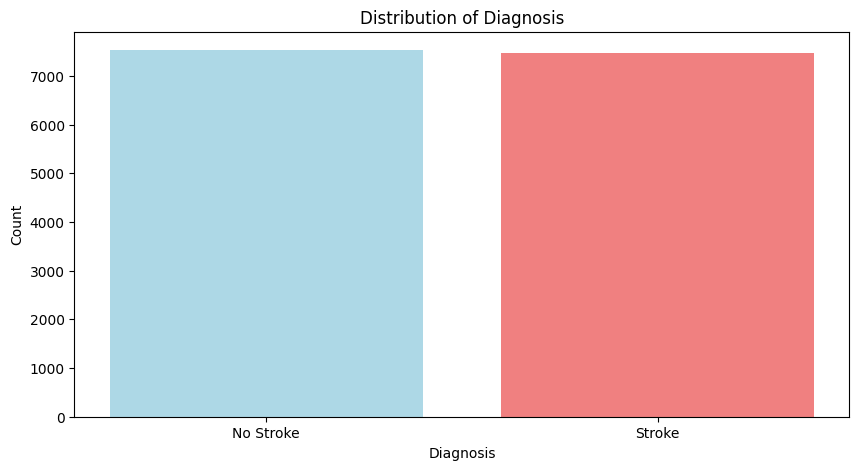

In [35]:
# Visualizing the data balance of the target variable - 'Diagnosis'

label = data['Diagnosis'].value_counts().index
values = data['Diagnosis'].value_counts().values

# Bar Chart

plt.figure(figsize=(10, 5))
plt.bar(label, values, color=["lightblue", "lightcoral"])
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# **Q3. What are the likely distributions of the numeric variables?**

In [36]:
# Importing data visualization library - Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

Numerical Columns:
['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']





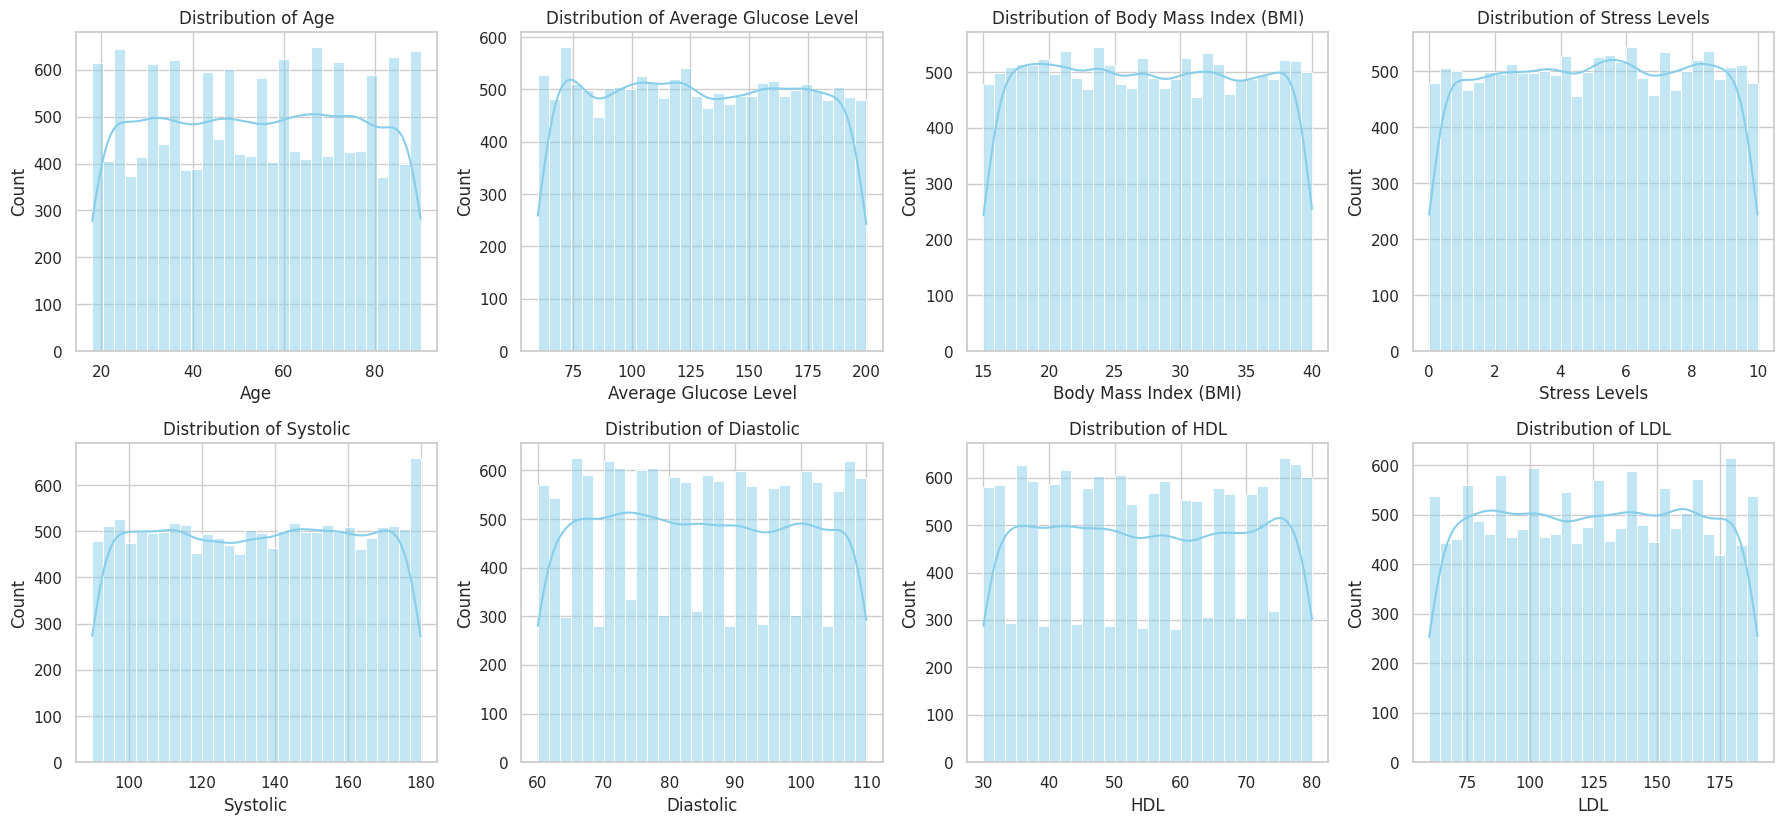

In [37]:
# Extracting numerical columns from dataset
numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

print("Numerical Columns:")
print(numerical_columns)
print("\n\n")

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating subplots for each numerical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

This graph displays the distribution of various health-related metrics including age, average glucose level, body mass index (BMI), stress levels, systolic and diastolic blood pressure, and levels of HDL and LDL cholesterol. Each metric is plotted with counts on the y-axis and the metric’s values on the x-axis.

*Inference -*
The average glucose level histogram shows a broad distribution with noticeable peaks. The body mass index (BMI) histogram exhibits a distribution resembling normality, peaking around 25-30 BMI. Systolic and diastolic blood pressure histograms display normal-like distributions centered at approximately 140 and 80, respectively. HDL and LDL cholesterol histograms show varying counts across different levels without clear patterns. Age and stress level histograms depict diverse counts with no clear patterns.

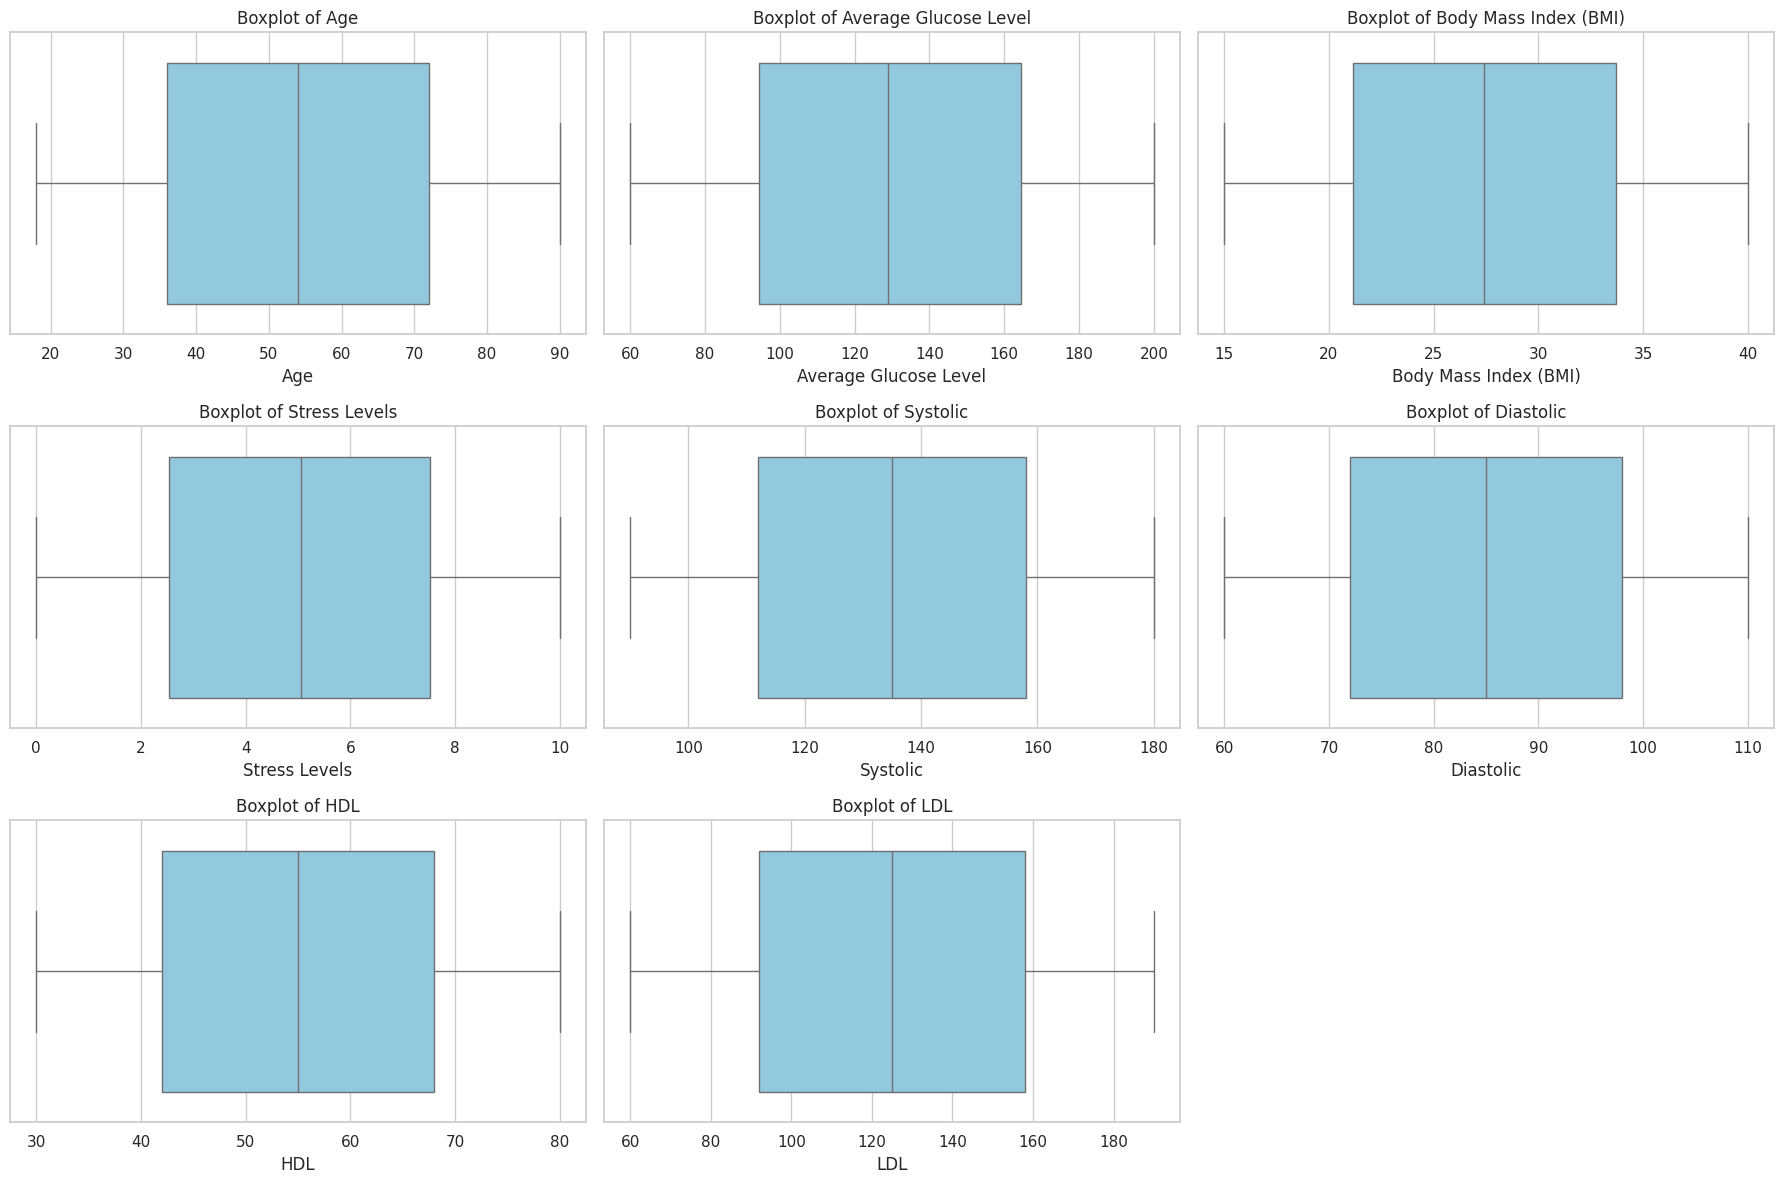

In [38]:
# Draw boxplots to find potential outliers

# Calculate the number of needed rows and columns based on the number of numerical columns
num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns - 1) // 3 + 1
num_cols = min(3, num_numerical_columns)

# Set up the grid layout for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows), sharey=True)

# Flatten the axes array to iterate through the subplots
axes = axes.flatten()

# Loop through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Hide empty subplots
for j in range(num_numerical_columns, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

According to the boxplot, there are no outliers present. This means that all the values in the dataset fall within the range of the whiskers.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


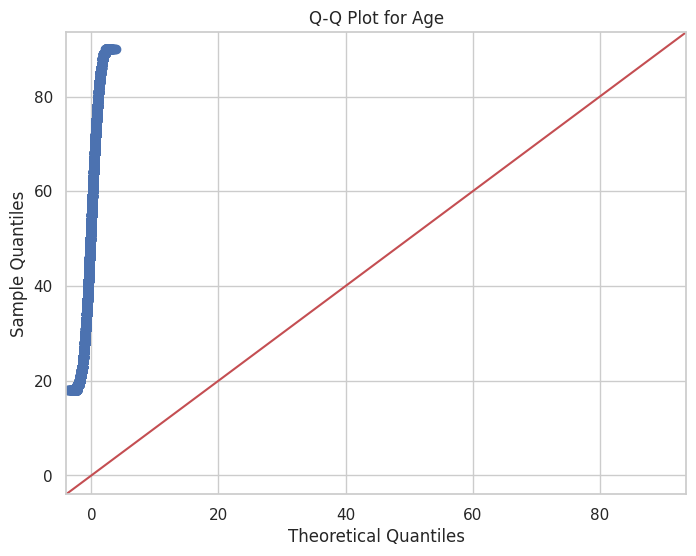

In [39]:
# Checking the distribution of independent variables
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'Age'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

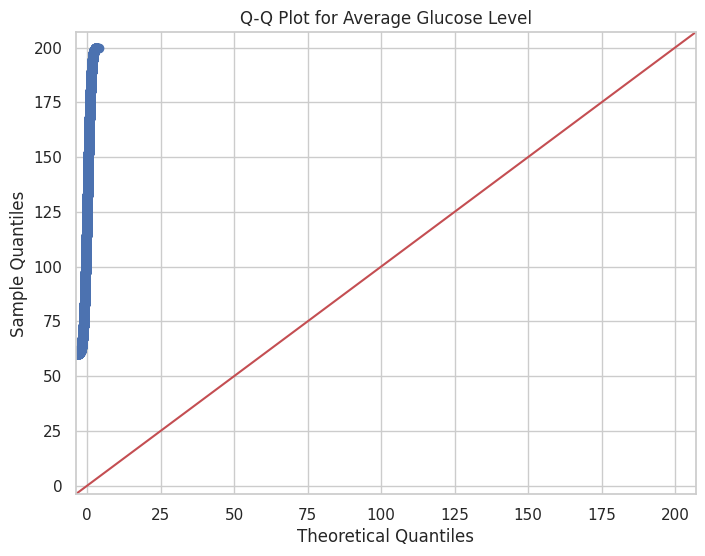

In [40]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'Average Glucose Level'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

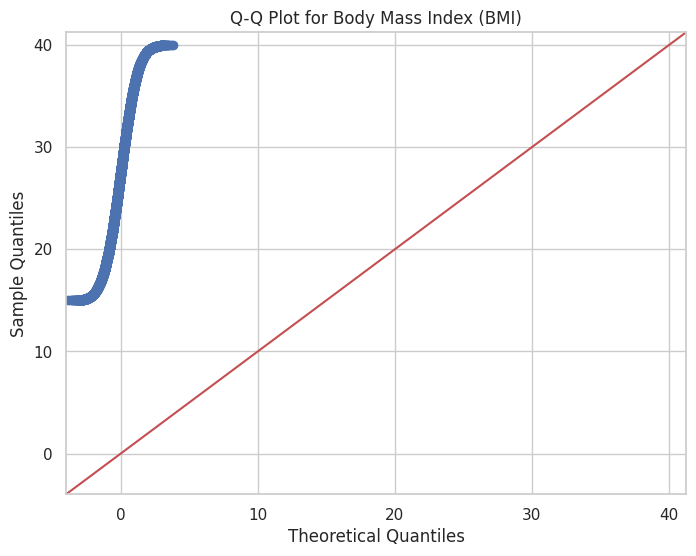

In [41]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'Body Mass Index (BMI)'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

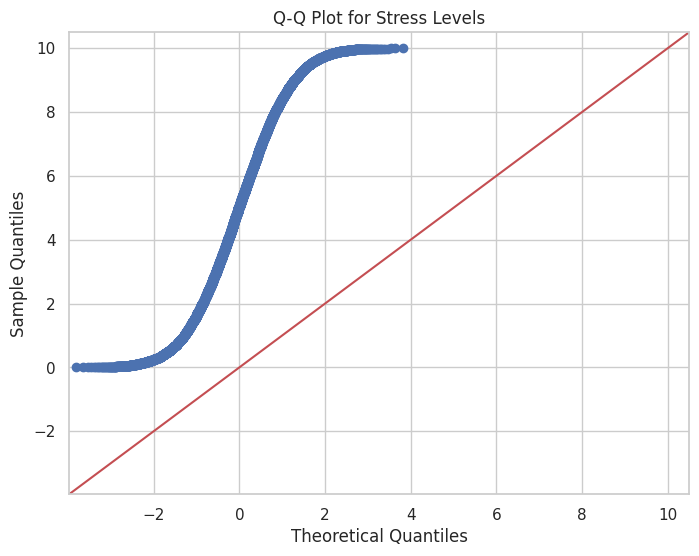

In [42]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'Stress Levels'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

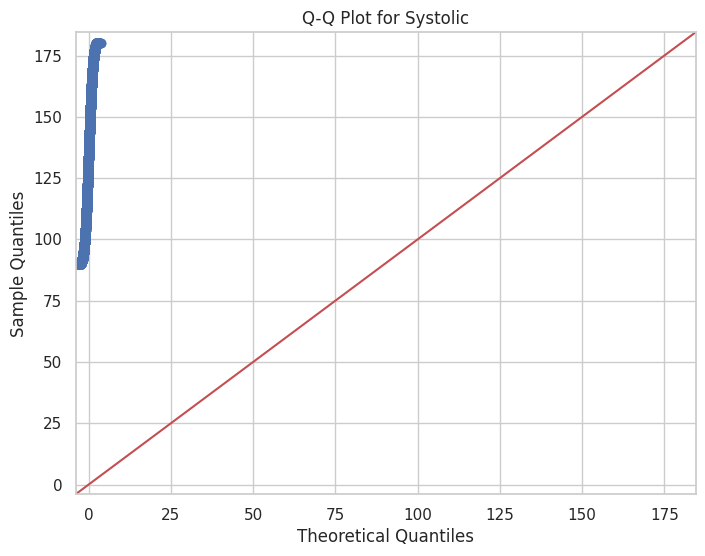

In [43]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'Systolic'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

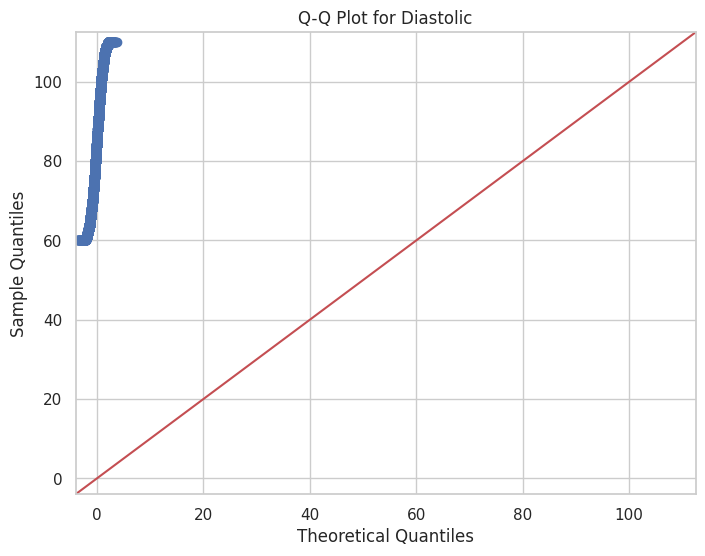

In [44]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'Diastolic'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

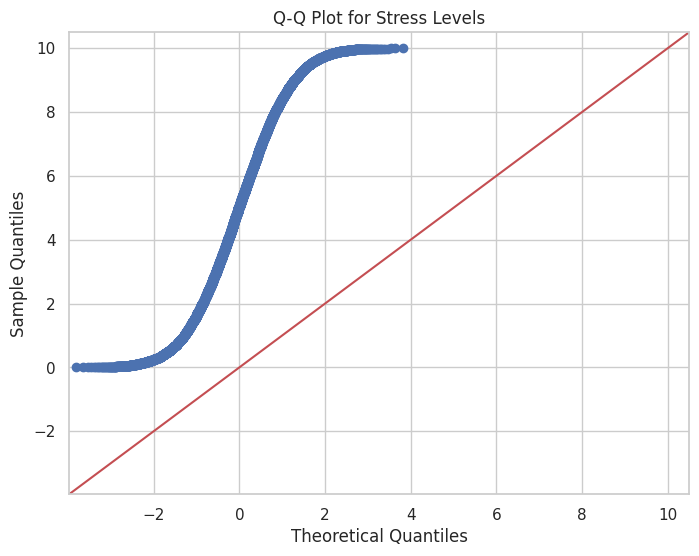

In [45]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'HDL'

numerical_column = 'Stress Levels'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

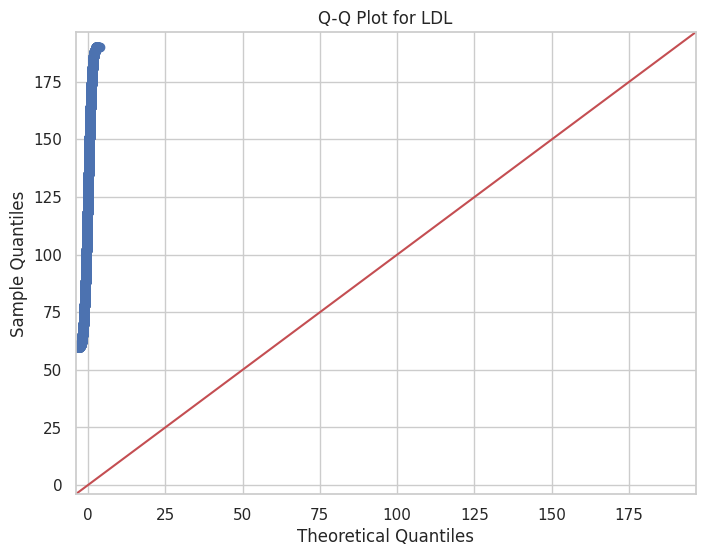

In [46]:
# Numerical Columns: ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

numerical_column = 'LDL'

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
ax.set_title(f'Q-Q Plot for {numerical_column}')
plt.show()

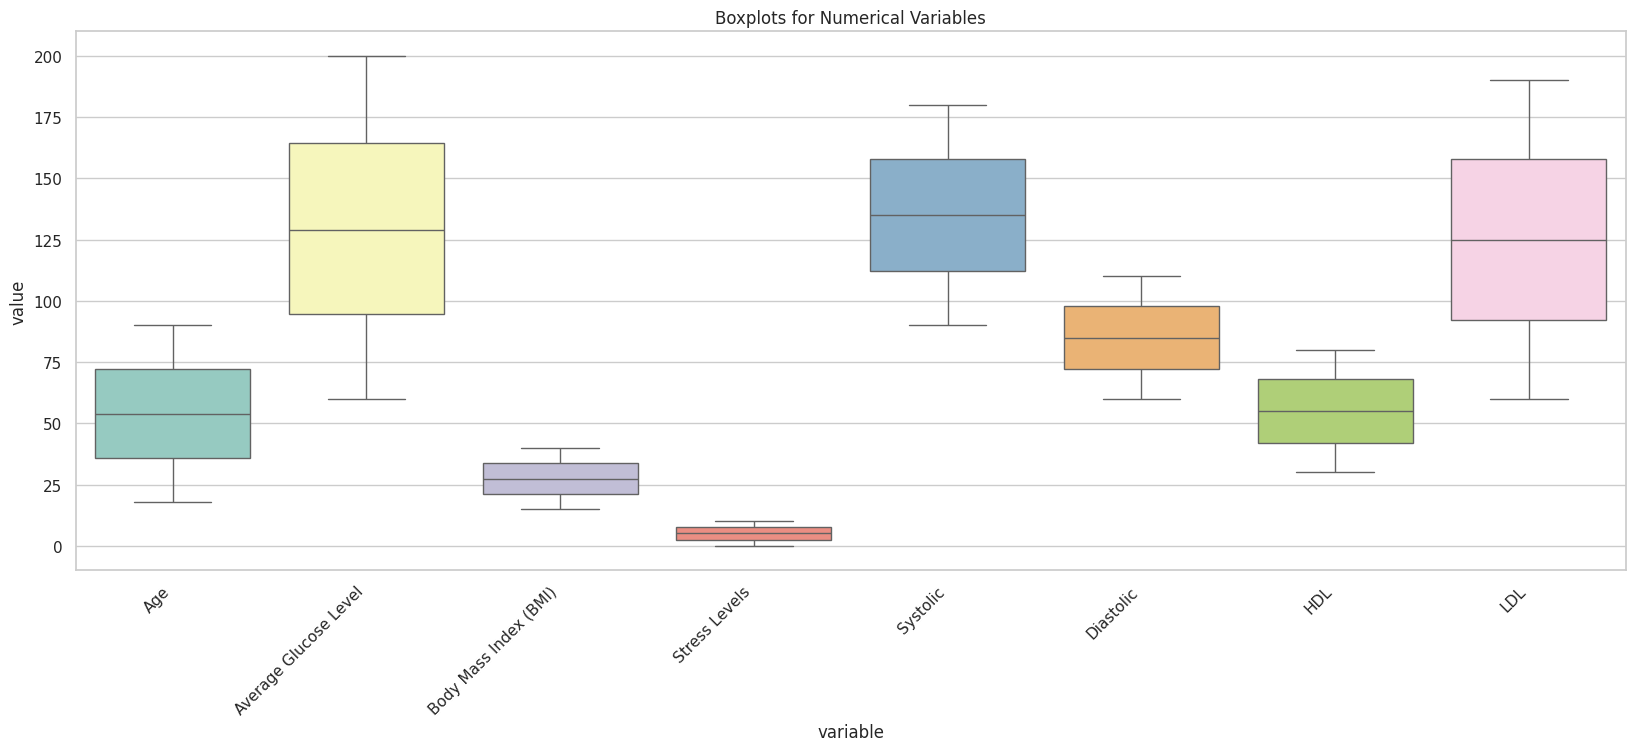

In [47]:
# Checking the Ranges of the predictor variables and dependent variable
melted_data = pd.melt(data, value_vars=numerical_columns)

# Create separate boxplots for each numerical variable
plt.figure(figsize=(20, 7))
sns.boxplot(x='variable', y='value', data=melted_data, hue='variable', palette='Set3', legend=False)
plt.title('Boxplots for Numerical Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

The Q-Q (quantile-quantile) plot suggests that there are indeed data points in the dataset that deviate significantly from what is expected in a normal distribution. The presence of outliers means that some values do not fit well into a normal distribution. So, making use of Box-Cox transformation to stabilize the variance.

In [48]:
# Creating a copy of the dataset before transformation
data_without_outliers = data.copy()

data_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

**DATA AFTER HANDLING OUTLIERS**

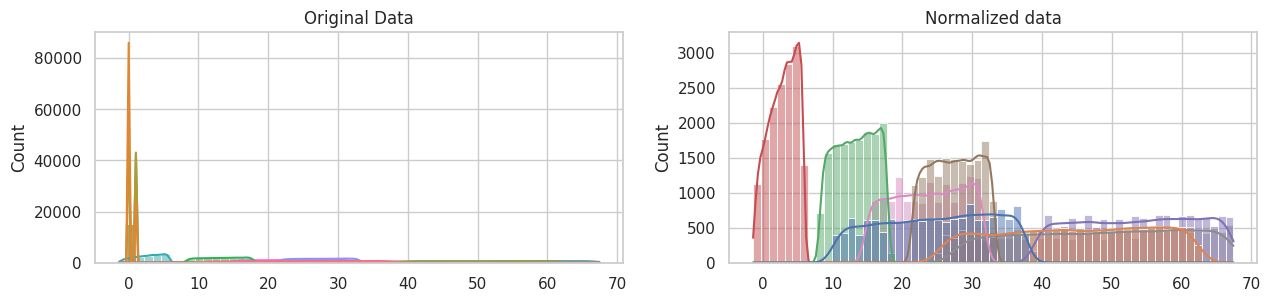

In [49]:
# for Box-Cox Transformation
from scipy import stats
from scipy.stats import boxcox

# Apply Box-Cox transformation to each numerical column
for column in numerical_columns:
    # Add a small constant to avoid zero values
    data_without_outliers[column] = data_without_outliers[column] + 0.001
    # Perform Box-Cox transformation
    data_without_outliers[column], _ = boxcox(data_without_outliers[column])

# Plot the transformed distributions
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data_without_outliers, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(data_without_outliers[numerical_columns], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# LOG TRANSFORMATION
# Identify numerical columns for log transformation
# numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# # Apply log transformation to each numerical column
# for column in numerical_columns:
#     # Add a small constant to avoid zero values
#     data[column] = np.log1p(data[column])

# # Plot the transformed distributions
# fig, ax = plt.subplots(1, 2, figsize=(15, 3))
# sns.histplot(data, ax=ax[0], kde=True, legend=False)
# ax[0].set_title("Original Data")
# sns.histplot(data[numerical_columns], ax=ax[1], kde=True, legend=False)
# ax[1].set_title("Log-transformed data")
# plt.show()

Utilizing the Box-Cox transformation to address data variance, as indicated by observations in the Q-Q plot.

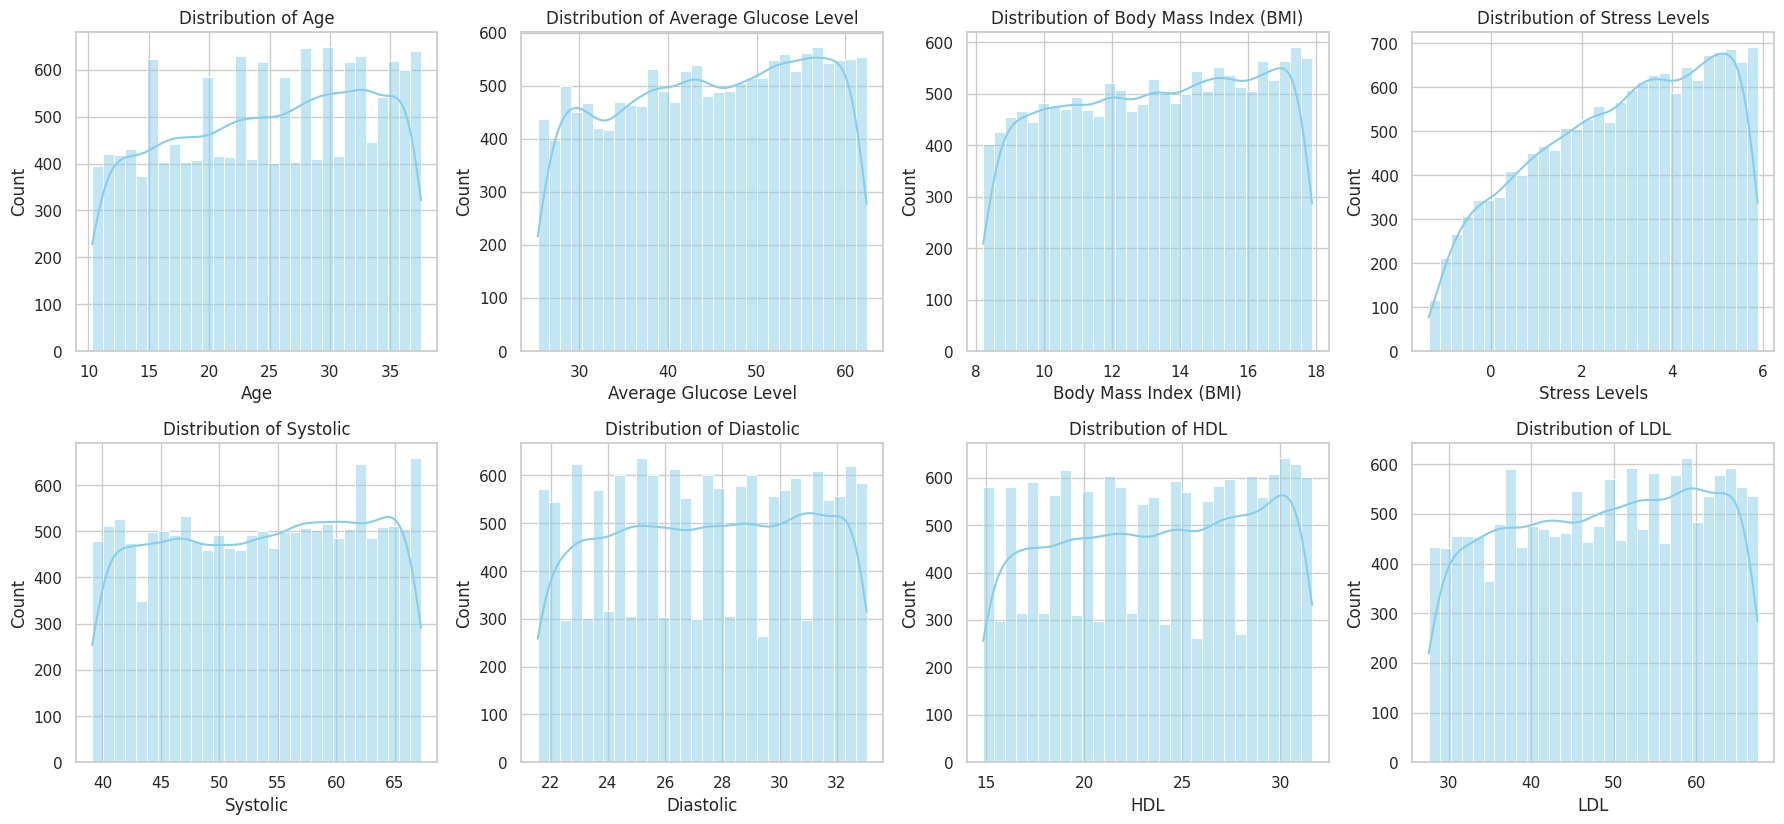

In [50]:
# Extracting numerical columns from dataset
# numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

# print("Numerical Columns:")
# print(numerical_columns)
# print("\n\n")

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating subplots for each numerical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data_without_outliers[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Plotting the histogram for numerical features after Box-cox transformation. The graphs have minor differences even after applying transformation.

**Label Encoding**

In [51]:
# numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']
# categorical_columns = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms']

# Label Encoding for Categorical Variables on Data Without Outliers
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_columns = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms']

for column in categorical_columns:
    data_without_outliers[column] = labelencoder.fit_transform(data_without_outliers[column])

data_without_outliers.head(10)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
0,25.917269,1,0,1,1,3,0,45.548403,11.370222,2,...,0,1,5,2.018735,1375,Stroke,55.296418,32.620325,27.965876,51.265622
1,34.267731,1,0,0,2,3,1,58.581840,15.272535,2,...,0,0,3,0.672627,3146,Stroke,57.135046,28.934061,26.386327,31.128284
2,14.000693,1,1,1,1,1,0,59.820544,10.527982,1,...,0,1,3,4.421395,4201,Stroke,59.558818,30.259305,25.097690,39.507615
3,31.906641,1,0,0,1,1,1,58.949528,13.385811,2,...,0,0,3,3.253463,4059,No Stroke,65.491631,26.658645,28.588651,52.450785
4,24.072657,1,1,1,0,3,1,57.066592,13.976355,0,...,0,1,4,4.150335,1150,Stroke,49.344355,29.820667,27.022148,30.428394
5,28.077229,0,0,0,2,2,1,34.869707,17.016158,0,...,0,0,0,2.937267,4637,Stroke,52.815364,22.561367,31.632557,30.778968
6,19.843654,0,1,0,1,2,1,30.841667,13.651971,0,...,1,0,6,3.879918,4637,No Stroke,66.658185,31.984679,15.231379,51.562732
7,27.721007,0,0,1,0,0,0,61.156565,12.978984,1,...,1,0,5,3.561442,2911,Stroke,66.948843,24.529504,27.338031,51.562732
8,31.564809,0,1,1,1,3,0,29.379968,14.364930,1,...,1,0,6,-0.280566,3075,Stroke,55.604140,32.197224,28.898196,53.334028
9,34.932667,1,0,0,0,3,1,40.333669,13.889878,0,...,1,1,2,5.026442,3075,No Stroke,48.705336,28.260583,15.617868,37.223432


Using label encoding to convert categorical data into numerical format.

# **Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

**Correlation Matrix**

<ipython-input-52-a21927418ffa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_without_outliers.corr(), annot=True, cmap="RdYlGn")


<Axes: >

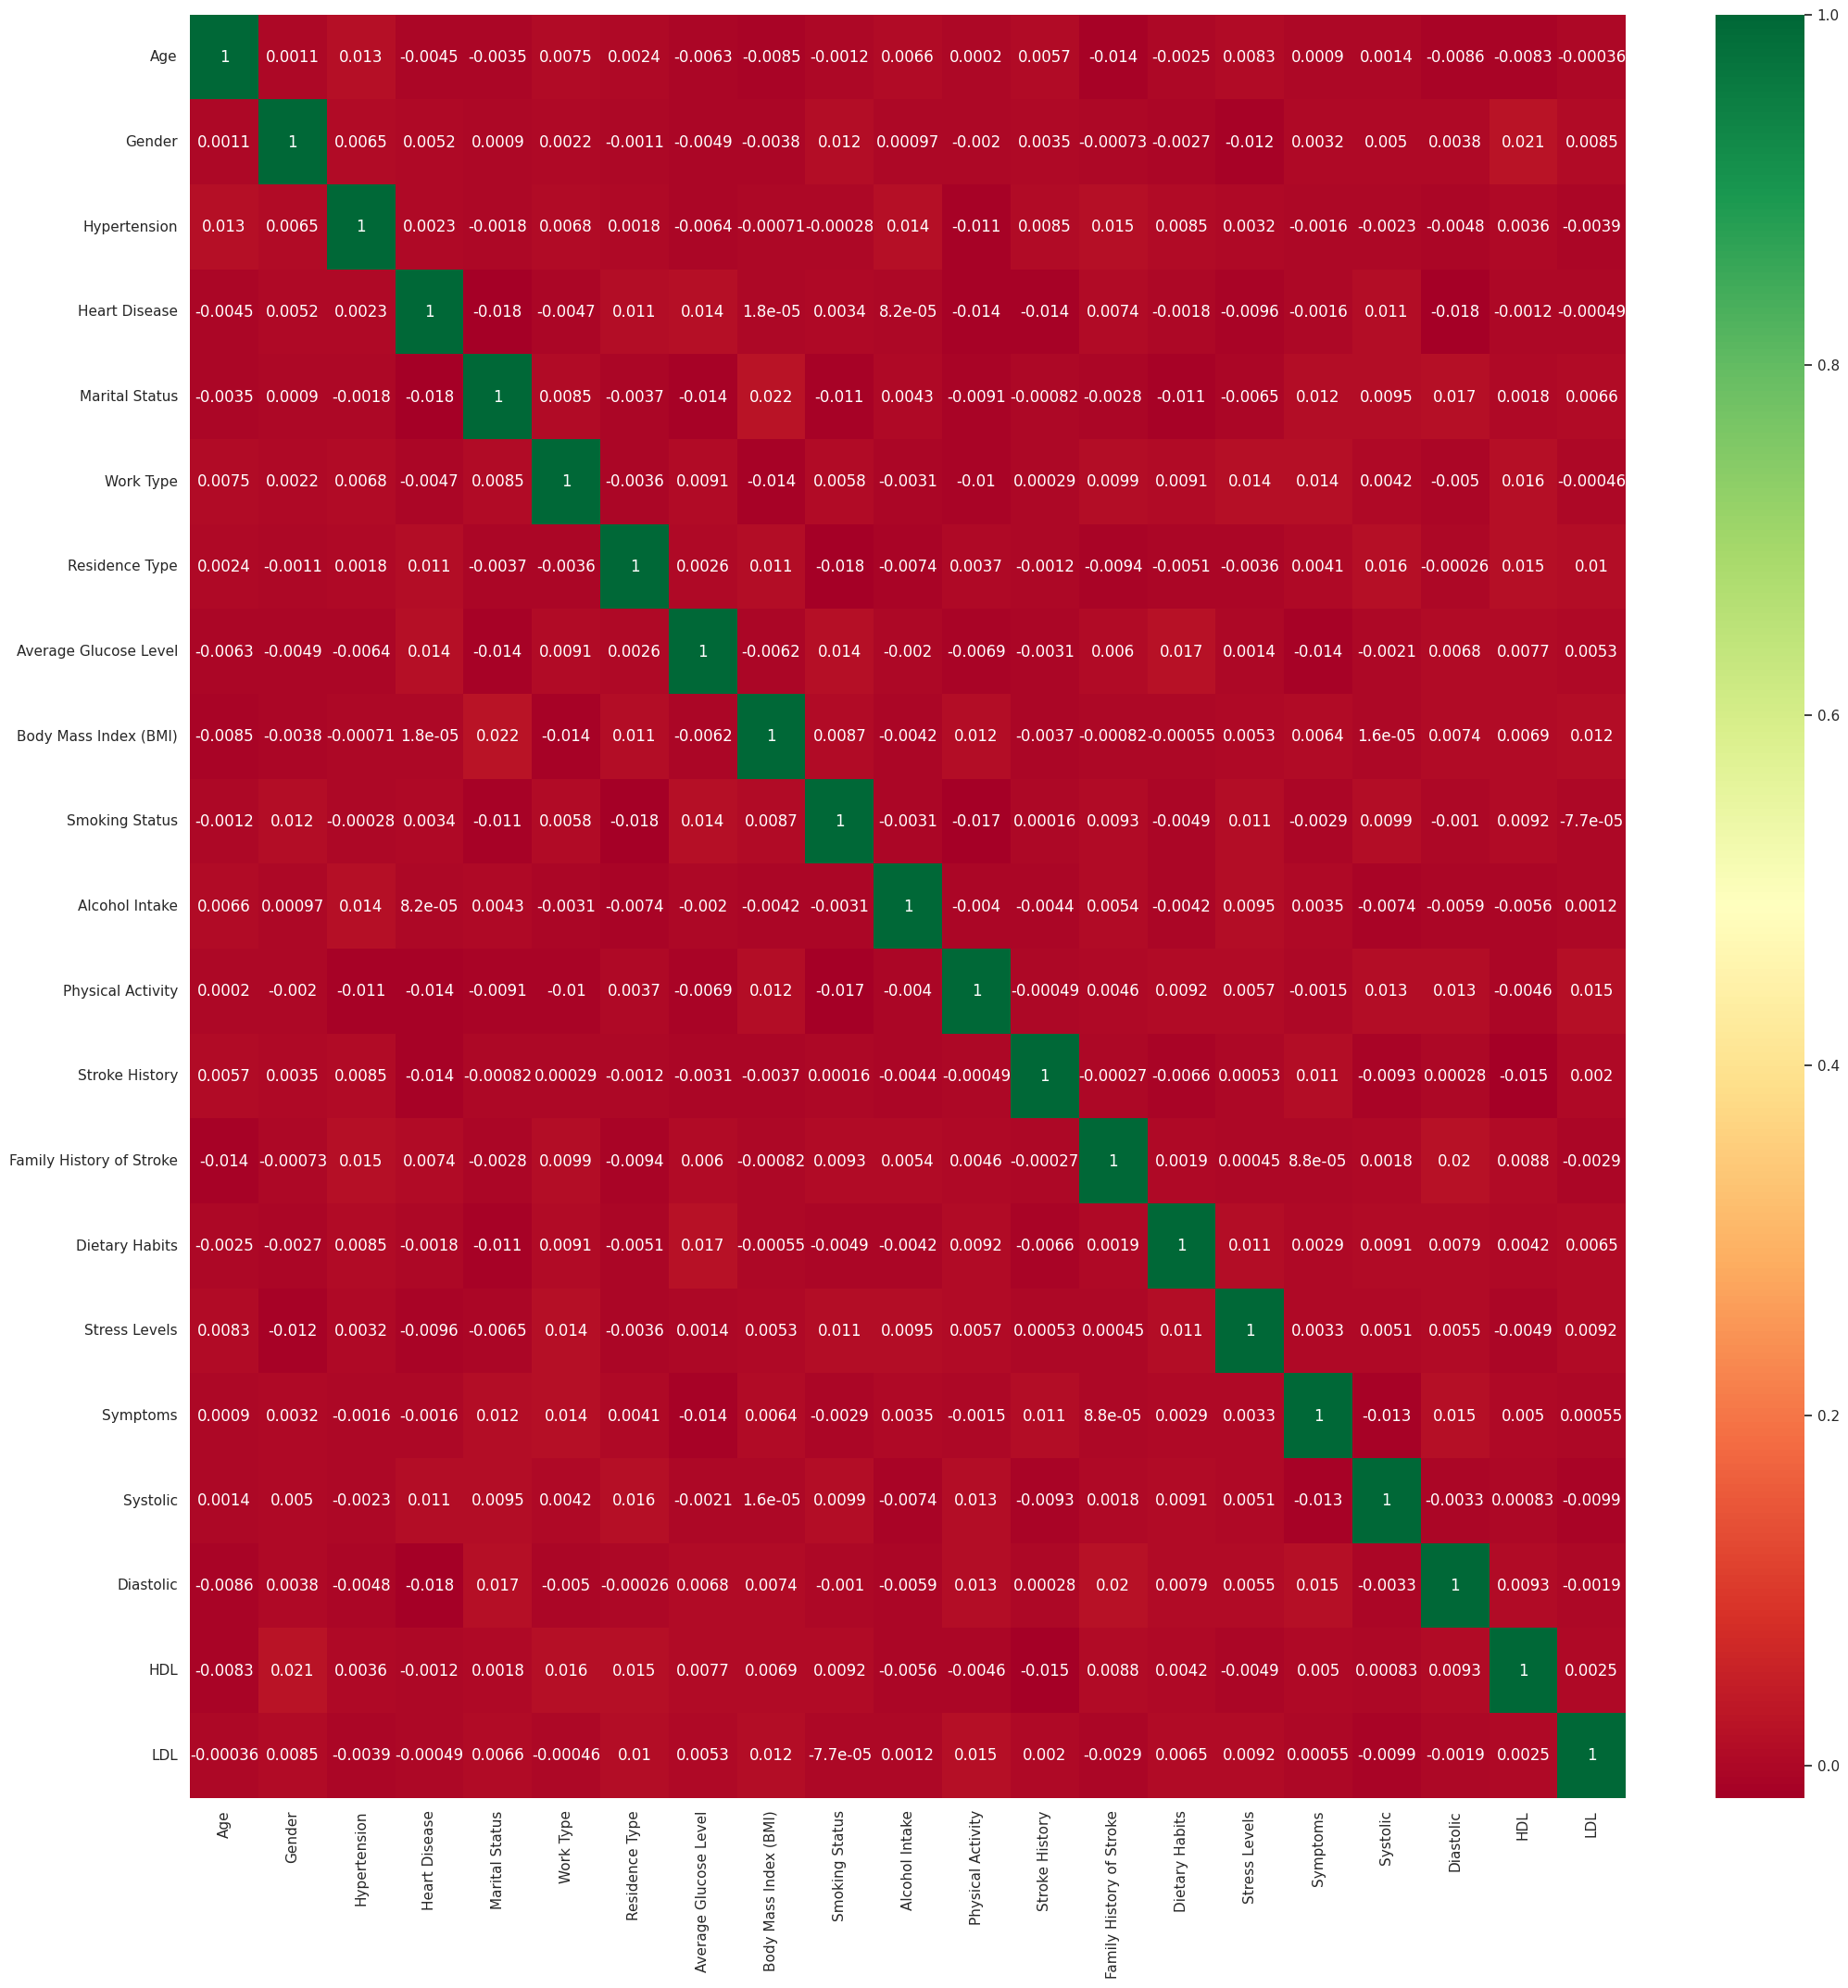

In [52]:
# 1. Heat map of the correlation
plt.figure(figsize=(25, 25))
sns.heatmap(data_without_outliers.corr(), annot=True, cmap="RdYlGn")

In [53]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.inspection import permutation_importance

# # Assuming 'Diagnosis' is the target variable
# target_variable = 'Diagnosis'

# # Features (exclude the target variable)
# X = data_without_outliers.drop(target_variable, axis=1)

# # Target variable
# y = data_without_outliers[target_variable]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Calculate permutation importances
# perm_importances = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# # Print feature names and their importances
# feature_names = X.columns
# for i in range(len(feature_names)):
#     feature = feature_names[i]
#     importance = perm_importances.importances_mean[i]
#     print(f"{feature}: {importance}")


In [54]:
# data_without_outliers.info()

# # print(data_without_outliers.columns)

# # # 1. Correlation Matrix - Check the correlation with target variable
# # correlation_matrix = data_without_outliers.corr()

# # # Extract correlations with the target variable ('Diagnosis' in this case)
# # correlation_with_target = correlation_matrix['Diagnosis']

# # # Display the correlation coefficients
# # print("Correlation with Target Variable:")
# # print(correlation_with_target)

# # Assuming 'Diagnosis' is your target variable
# target_variable = 'Diagnosis'

# # Calculate the correlation matrix
# correlation_matrix = data_without_outliers.corr()

# # Extract correlations with the target variable
# correlation_with_target = correlation_matrix[target_variable]

# # Display the correlation coefficients
# print("Correlation with Target Variable:")
# print(correlation_with_target)


Feature Importances:
                     Feature  Importance
8      Body Mass Index (BMI)    0.091619
7      Average Glucose Level    0.091548
15             Stress Levels    0.091159
16                  Symptoms    0.088064
20                       LDL    0.083152
17                  Systolic    0.081876
0                        Age    0.077246
18                 Diastolic    0.074862
19                       HDL    0.074530
14            Dietary Habits    0.041632
5                  Work Type    0.029522
10            Alcohol Intake    0.029215
11         Physical Activity    0.022844
9             Smoking Status    0.022391
4             Marital Status    0.021237
3              Heart Disease    0.013916
6             Residence Type    0.013833
13  Family History of Stroke    0.013249
12            Stroke History    0.013207
1                     Gender    0.013165
2               Hypertension    0.011733





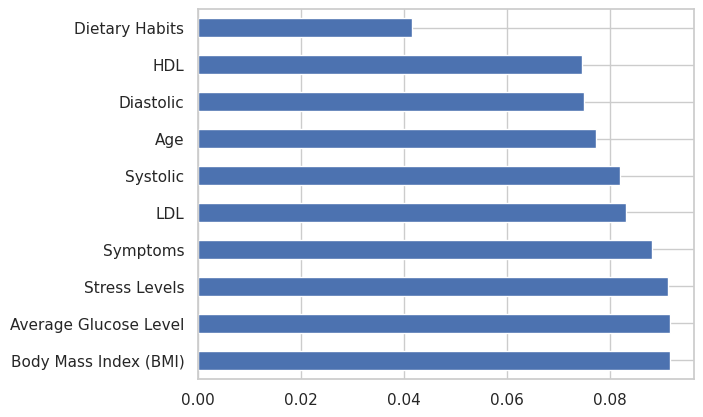

In [55]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X = data_without_outliers.drop('Diagnosis', axis=1)
y = data_without_outliers['Diagnosis']

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)
print("\n\n")

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Top 10 features
plt.show()

In [56]:
# 3. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assume X is your feature matrix and y is your target variable
X = data_without_outliers.drop('Diagnosis', axis=1)  # Features (excluding the target variable)
y = data_without_outliers['Diagnosis']  # Target variable

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)

# Get ranking of features and feature names
feature_ranking = rfe.ranking_
feature_names = X.columns

# Create a DataFrame
feature_ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Sort the DataFrame based on the ranking
sorted_feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

# Display the sorted DataFrame
print(sorted_feature_ranking_df)

                     Feature  Ranking
7      Average Glucose Level        1
8      Body Mass Index (BMI)        2
15             Stress Levels        3
16                  Symptoms        4
20                       LDL        5
17                  Systolic        6
0                        Age        7
18                 Diastolic        8
19                       HDL        9
14            Dietary Habits       10
10            Alcohol Intake       11
5                  Work Type       12
9             Smoking Status       13
11         Physical Activity       14
4             Marital Status       15
6             Residence Type       16
1                     Gender       17
3              Heart Disease       18
12            Stroke History       19
13  Family History of Stroke       20
2               Hypertension       21


Based on the results of Correlation Matrix, Random Forest Classifier and Recursive Feature Elimination methods, the top most important features include Average Glucose Level, BMI and Stress Levels in predicting stroke.

# **Q6. Do the training and test sets have the same data?**

## **Splitting the dataset into training and testing data**


In [57]:
from sklearn.model_selection import train_test_split

# 'Diagnosis' is target variable, and other columns are features
X = data_without_outliers.drop('Diagnosis', axis=1)
y = data_without_outliers['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

common_data_points = set(X_train.index) & set(X_test.index)
print("Common Data Points between Training and Test Sets:", len(common_data_points))

Common Data Points between Training and Test Sets: 0



The training and test datasets are completely independent of each other, which is essential for optimal model training.

# **Q11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

***PART A - WITHOUT OUTLIERS***

In [58]:
# 1st MODEL - RANDOM FOREST CLASSIFIER
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance values
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nRandom Forest Accuracy: {accuracy}')

Feature Importances:
                     Feature  Importance
8      Body Mass Index (BMI)    0.091041
15             Stress Levels    0.090930
7      Average Glucose Level    0.090536
16                  Symptoms    0.088383
20                       LDL    0.082893
17                  Systolic    0.082635
0                        Age    0.078396
18                 Diastolic    0.075944
19                       HDL    0.074721
14            Dietary Habits    0.041915
10            Alcohol Intake    0.029261
5                  Work Type    0.028620
11         Physical Activity    0.022802
9             Smoking Status    0.022528
4             Marital Status    0.021291
3              Heart Disease    0.013573
6             Residence Type    0.013458
13  Family History of Stroke    0.013296
12            Stroke History    0.013084
1                     Gender    0.013028
2               Hypertension    0.011663

Random Forest Accuracy: 0.49766666666666665


In [59]:
# 2nd MODEL - LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
lr_predictions = lr_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, lr_predictions))

# Display feature names along with their coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_[0]})
print(coef_df)

Logistic Regression Accuracy: 0.512
              precision    recall  f1-score   support

   No Stroke       0.50      0.60      0.55      1481
      Stroke       0.52      0.42      0.47      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

                     Feature  Coefficient
0                        Age     0.000095
1                     Gender    -0.000521
2               Hypertension    -0.002911
3              Heart Disease     0.001304
4             Marital Status    -0.004880
5                  Work Type     0.010070
6             Residence Type     0.000100
7      Average Glucose Level     0.003008
8      Body Mass Index (BMI)    -0.009020
9             Smoking Status     0.000652
10            Alcohol Intake     0.001907
11         Physical Activity     0.002725
12            Stroke History    -0.003646
13  Family History of Stroke    -0.002844
14     

In [60]:
# 3rd MODEL - GRADING BOOST CLASSIFIER
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
gb_predictions = gb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Classifier Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, gb_predictions))

# Display feature names along with their importance
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model.feature_importances_})
print(importances_df)

Gradient Boosting Classifier Accuracy: 0.5043333333333333
              precision    recall  f1-score   support

   No Stroke       0.50      0.53      0.51      1481
      Stroke       0.51      0.48      0.50      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

                     Feature  Importance
0                        Age    0.068974
1                     Gender    0.000000
2               Hypertension    0.008141
3              Heart Disease    0.000014
4             Marital Status    0.001708
5                  Work Type    0.023932
6             Residence Type    0.000000
7      Average Glucose Level    0.141693
8      Body Mass Index (BMI)    0.176739
9             Smoking Status    0.009272
10            Alcohol Intake    0.009560
11         Physical Activity    0.006216
12            Stroke History    0.010398
13  Family History of Stroke    0.011125


***PART B - WITH OUTLIERS***

In [61]:
# WITH OUTLIERS

# numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']
# categorical_columns = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms']

# Label Encoding for Categorical Variables on Data Without Outliers
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_columns = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms']
categorical_columns

categorical = data.select_dtypes(exclude='number')
categorical

for column in categorical:
    numericColumn = labelencoder.fit_transform(categorical[column])
    data[column] = numericColumn

data.head(10)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
0,56,1,0,1,1,3,0,130.91,22.37,2,...,0,1,5,3.48,1375,1,140,108,68,133
1,80,1,0,0,2,3,1,183.73,32.57,2,...,0,0,3,1.73,3146,1,146,91,63,70
2,26,1,1,1,1,1,0,189.00,20.32,1,...,0,1,3,7.31,4201,1,154,97,59,95
3,73,1,0,0,1,1,1,185.29,27.50,2,...,0,0,3,5.35,4059,0,174,81,70,137
4,51,1,1,1,0,3,1,177.34,29.06,0,...,0,1,4,6.84,1150,1,121,95,65,68
5,62,0,0,0,2,2,1,91.60,37.47,0,...,0,0,0,4.85,4637,1,132,64,80,69
6,40,0,1,0,1,2,1,77.83,28.20,0,...,1,0,6,6.38,4637,0,178,105,31,134
7,61,0,0,1,0,0,0,194.73,26.44,1,...,1,0,5,5.85,2911,1,179,72,66,134
8,72,0,1,1,1,3,0,72.99,30.10,1,...,1,0,6,0.73,3075,1,141,106,71,140
9,82,1,0,0,0,3,1,111.23,28.83,0,...,1,1,2,8.39,3075,0,119,88,32,88


Label encoding is performed on the dataset before transformation to convert categorical values to numerical values.

<Axes: >

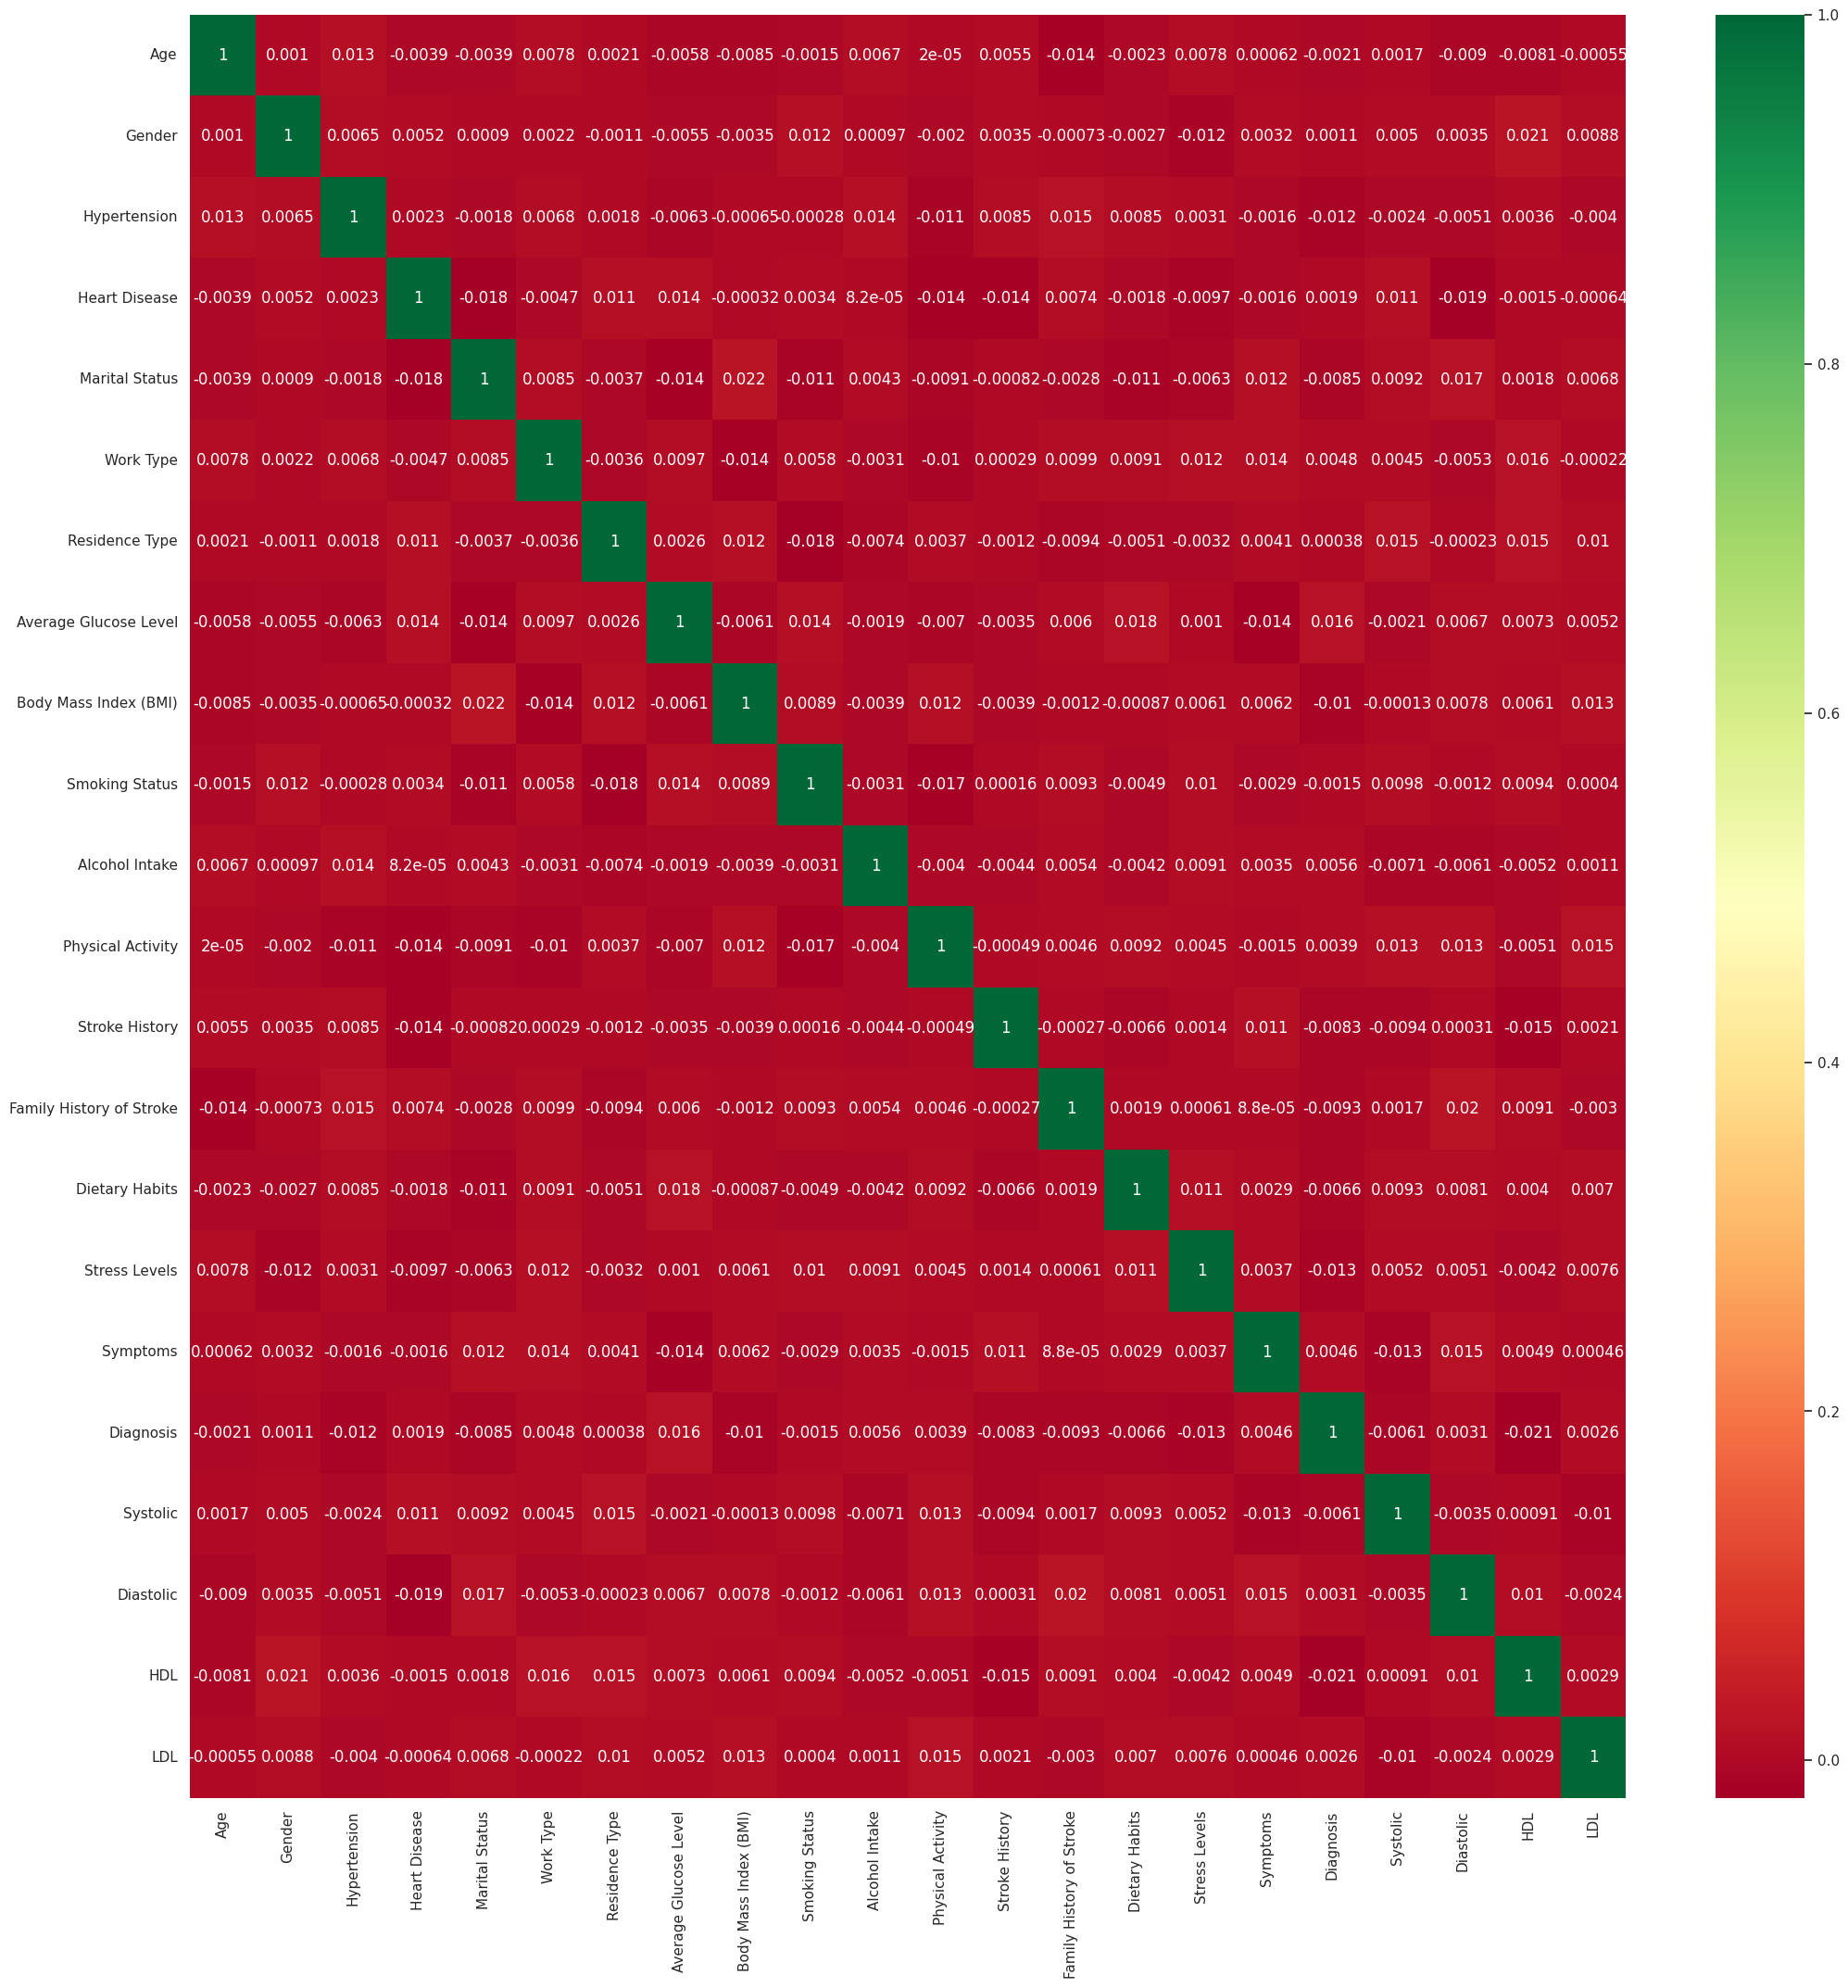

In [62]:
# the heat map of the correlation with outliers
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

In [63]:
# Feature importance of data with outliers
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume X is your feature matrix and y is your target variable
X = data.drop('Diagnosis', axis=1)  # Assuming 'Diagnosis' is the target variable
y = data['Diagnosis']

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                     Feature  Importance
7      Average Glucose Level    0.091790
15             Stress Levels    0.091021
8      Body Mass Index (BMI)    0.090967
16                  Symptoms    0.087646
20                       LDL    0.083278
17                  Systolic    0.081289
0                        Age    0.079559
18                 Diastolic    0.075822
19                       HDL    0.073736
14            Dietary Habits    0.042303
10            Alcohol Intake    0.029904
5                  Work Type    0.029036
11         Physical Activity    0.023275
9             Smoking Status    0.022269
4             Marital Status    0.020072
1                     Gender    0.013604
6             Residence Type    0.013305
13  Family History of Stroke    0.013235
12            Stroke History    0.013129
3              Heart Disease    0.013042
2               Hypertension    0.011721


The importance of features such as Average Glucose Level, Stress Levels, and Body Mass Index (BMI) in predicting strokes remains consistent, whether outliers are present or not.

**Splitting the data into training and testing data**

In [64]:
X = data.drop('Diagnosis', axis=1)  # Features
y = data['Diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# 1st MODEL - RANDOM FOREST CLASSIFIER - WITH OUTLIERS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance values
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nRandom Forest Accuracy: {accuracy}')

Feature Importances:
                     Feature  Importance
8      Body Mass Index (BMI)    0.091644
15             Stress Levels    0.091357
7      Average Glucose Level    0.090800
16                  Symptoms    0.087826
20                       LDL    0.083711
17                  Systolic    0.081669
0                        Age    0.077571
18                 Diastolic    0.075641
19                       HDL    0.074607
14            Dietary Habits    0.041619
10            Alcohol Intake    0.028939
5                  Work Type    0.027842
9             Smoking Status    0.023026
11         Physical Activity    0.022511
4             Marital Status    0.022368
13  Family History of Stroke    0.014075
3              Heart Disease    0.013377
1                     Gender    0.013277
6             Residence Type    0.013101
12            Stroke History    0.012854
2               Hypertension    0.012186

Random Forest Accuracy: 0.5036666666666667


In [66]:
# 2nd MODEL - LOGISTIC REGRESSION WITH OUTLIERS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model with increased max_iter
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
lr_predictions = lr_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, lr_predictions))

# Display feature names along with their coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_[0]})
print(coef_df)

Logistic Regression Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1481
           1       0.51      0.42      0.46      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

                     Feature  Coefficient
0                        Age    -0.000073
1                     Gender    -0.001484
2               Hypertension    -0.008238
3              Heart Disease     0.003794
4             Marital Status    -0.013072
5                  Work Type     0.026380
6             Residence Type     0.000545
7      Average Glucose Level     0.000829
8      Body Mass Index (BMI)    -0.002229
9             Smoking Status     0.002237
10            Alcohol Intake     0.005681
11         Physical Activity     0.007844
12            Stroke History    -0.010368
13  Family History of Stroke    -0.008090
14       

In [67]:
# 3rd MODEL - GRADING BOOST CLASSIFIER WITH OUTLIERS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
gb_predictions = gb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Classifier Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, gb_predictions))

# Display feature names along with their importance
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model.feature_importances_})
print(importances_df)

Gradient Boosting Classifier Accuracy: 0.5043333333333333
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      1481
           1       0.51      0.48      0.50      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

                     Feature  Importance
0                        Age    0.068964
1                     Gender    0.000000
2               Hypertension    0.008137
3              Heart Disease    0.000000
4             Marital Status    0.001713
5                  Work Type    0.023913
6             Residence Type    0.000000
7      Average Glucose Level    0.142777
8      Body Mass Index (BMI)    0.176877
9             Smoking Status    0.009257
10            Alcohol Intake    0.009555
11         Physical Activity    0.005486
12            Stroke History    0.010410
13  Family History of Stroke    0.011125


The model's accuracy exhibits negligible differences whether outliers are included or excluded during both training and testing. Key features contributing to predictions include Average Glucose Level, BMI, Stress Levels, Symptoms, and Blood Pressure.

# **Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [69]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Make a copy of the original data
original_data = data.copy()

# Function to introduce missing values and impute them using different methods
def evaluate_imputation(data, missing_percentage):
    # Seed for reproducibility
    np.random.seed(42)

    # Randomly select indices to set as missing values
    total_entries = data.shape[0] * data.shape[1]
    num_missing_entries = int(missing_percentage * total_entries)
    missing_indices = np.random.choice(total_entries, size=num_missing_entries, replace=False)

    # Create a mask to mark missing values
    missing_mask = np.full(data.size, False)
    missing_mask[missing_indices] = True
    missing_mask = missing_mask.reshape(data.shape)

    # Introduce missing values in the dataset
    data_with_missing = data.mask(missing_mask)

    # Impute missing values using different methods
    # Method 1: Mean imputation
    imputer_mean = SimpleImputer(strategy='mean')
    data_imputed_mean = imputer_mean.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_mean = pd.DataFrame(data_imputed_mean, columns=data.columns)

    # Method 2: Median imputation
    imputer_median = SimpleImputer(strategy='median')
    data_imputed_median = imputer_median.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_median = pd.DataFrame(data_imputed_median, columns=data.columns)

    # Method 3: k-NN imputation
    imputer_knn = KNNImputer(n_neighbors=5)
    data_imputed_knn = imputer_knn.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=data.columns)

    # Split the dataset into features and target variable
    X_mean = data_imputed_mean.drop(columns=['Diagnosis'])
    y_mean = data_imputed_mean['Diagnosis']

    X_median = data_imputed_median.drop(columns=['Diagnosis'])
    y_median = data_imputed_median['Diagnosis']

    X_knn = data_imputed_knn.drop(columns=['Diagnosis'])
    y_knn = data_imputed_knn['Diagnosis']

    # Split the dataset into training and testing sets
    X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)
    X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

    # Fit a model for bias and variance calculation
    model = RandomForestRegressor()
    model.fit(X_train_mean, y_train_mean)

    # Calculate bias and variance
    y_pred_mean = model.predict(X_test_mean)
    bias_mean = np.mean((y_test_mean - np.mean(y_pred_mean))**2)
    variance_mean = np.var(y_pred_mean)

    # Repeat for median imputation
    model.fit(X_train_median, y_train_median)
    y_pred_median = model.predict(X_test_median)
    bias_median = np.mean((y_test_median - np.mean(y_pred_median))**2)
    variance_median = np.var(y_pred_median)

    # Repeat for k-NN imputation
    model.fit(X_train_knn, y_train_knn)
    y_pred_knn = model.predict(X_test_knn)
    bias_knn = np.mean((y_test_knn - np.mean(y_pred_knn))**2)
    variance_knn = np.var(y_pred_knn)

    # Evaluate the performance of imputation methods using RMSE
    mse_mean = mean_squared_error(original_data, data_imputed_mean, squared=False)
    mse_median = mean_squared_error(original_data, data_imputed_median, squared=False)
    mse_knn = mean_squared_error(original_data, data_imputed_knn, squared=False)

    return mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn

# Evaluate imputation performance for different missing percentages
missing_percentages = [0.01, 0.05, 0.1]

for missing_percentage in missing_percentages:
    mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn = evaluate_imputation(original_data, missing_percentage)

    print(f"\nMissing Percentage: {missing_percentage * 100}%")
    print(f"Mean Imputation RMSE: {mse_mean}")
    print(f"Mean Imputation Bias: {bias_mean}")
    print(f"Mean Imputation Variance: {variance_mean}")
    print(f"Median Imputation RMSE: {mse_median}")
    print(f"Median Imputation Bias: {bias_median}")
    print(f"Median Imputation Variance: {variance_median}")
    print(f"k-NN Imputation RMSE: {mse_knn}")
    print(f"k-NN Imputation Bias: {bias_knn}")
    print(f"k-NN Imputation Variance: {variance_knn}")



Missing Percentage: 1.0%
Mean Imputation RMSE: 8.69904105883685
Mean Imputation Bias: 0.24827917579671357
Mean Imputation Variance: 0.004791356663087912
Median Imputation RMSE: 8.710782197798501
Median Imputation Bias: 0.2500539628444445
Median Imputation Variance: 0.004819423822222222
k-NN Imputation RMSE: 9.697993923291264
k-NN Imputation Bias: 0.2485913851448889
k-NN Imputation Variance: 0.004936229432888889

Missing Percentage: 5.0%
Mean Imputation RMSE: 18.50652577227291
Mean Imputation Bias: 0.2372801582453508
Mean Imputation Variance: 0.004263185458751881
Median Imputation RMSE: 18.56137037644565
Median Imputation Bias: 0.24956180840000003
Median Imputation Variance: 0.004576667155555556
k-NN Imputation RMSE: 19.921684754438896
k-NN Imputation Bias: 0.23966393781733328
k-NN Imputation Variance: 0.004183659782666666

Missing Percentage: 10.0%
Mean Imputation RMSE: 26.369922749358775
Mean Imputation Bias: 0.222705486156473
Mean Imputation Variance: 0.0042010798836429825
Median Im

Here, Mean imputation and Median imputation show similar performance.
k-NN imputation tends to have slightly higher RMSE but similar bias and variance.

# **For categorical data, calculate the accuracy and a confusion matrix.**

Accuracy: 0.515


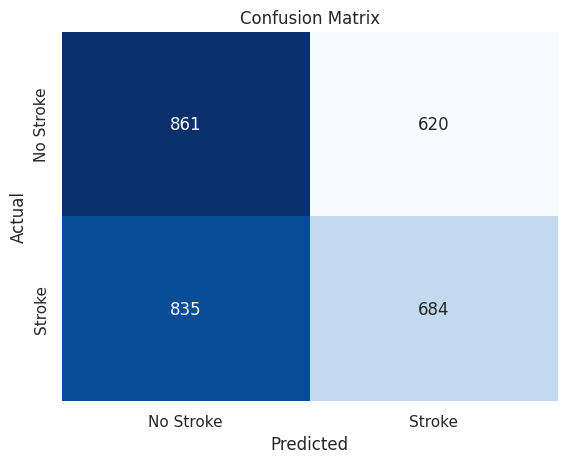

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a colorful heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Answers:**

# **Q5. Which independent variables have missing data? How much?**

The 'Symptoms' column had 2500 missing values, and the 'Stress Levels' column had 5 missing values, as indicated in the code snippet Q2.

# **Q7. In the predictor variables independent of all the other predictor variables?**

The correlation matrix depicts connections among different independent variables. For instance, the correlation coefficient of 0.0091 suggests minor dependencies between Dietary Habits and Systolic Blood Pressure Levels. Consequently, these variables exhibit some multicollinearity and are not entirely independent of one another.

# **Q8. Which predictor variables are the most important?**

The important features or predictor variables has been identified using Random Forest Classifier model, Correlation Metrix and Recursive Feature Elimination method and the top features include Average Glucose Level, BMI and Stress Levels in predicting stroke.

# **Q9. Do the ranges of the predictor variables make sense?**

Based on the boxplot, the ranges of the predictor variables appear reasonable as they fall within typical values for human health metrics.

# **Q10. What are the distributions of the predictor variables?**

The histogram reveals a wide distribution of variables within the range, while the box plot provides a clear representation of all records falling within the range. However, the Q-Q plot indicates the presence of some outliers. After addressing the outliers, the dataset is further processed for training and testing the model. Overall, the distributions appear satisfactory, particularly when considering the box plots for this dataset.

# **References**


*   https://scikit-learn.org/stable/user_guide.html

*   https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97

*   https://forecastegy.com/posts/feature-importance-in-random-forests/
*   https://library.virginia.edu/data/articles/understanding-q-q-plots#:~:text=A%20QQ%20plot%20is%20a,truly%20come%20from%20normal%20distributions.

*   https://www.mygreatlearning.com/blog/label-encoding-in-python/

MIT License

Copyright (c) 2024 Soumya Ganesh

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.